In [1]:
import numpy as np
import pandas as pd
from sompy.sompy import SOMFactory


In [8]:

dataset = pd.read_csv("../en_climate_summaries_All_02-2020.csv")
names = {
    "Long": "Longitude (West - , degrees)",
    "Lat": "Latitude (North + , degrees)",
    "Tm": "Mean Temperature (°C)",
    "Tx": "Highest Monthly Maximum Temperature (°C)",
    "Tn": "Lowest Monthly Minimum Temperature (°C)",
    "S": "Snowfall (cm)",
    "P": "Total Precipitation (mm)",
    "HDD": "Degree Days below 18 °C",
}
data = dataset[names.keys()]
data = data.apply(pd.to_numeric, errors="coerce")
data = data.dropna()

data.head()




,Long,Lat,Tm,Tx,Tn,S,P,HDD
0,-123.742,48.935,5.1,10.5,-0.5,15.6,86.6,373.0
1,-124.052,48.829,3.3,13.0,-6.0,2.0,202.8,220.5
4,-123.573,48.985,5.6,10.5,0.0,0.4,39.7,261.1
9,-123.287,48.764,5.0,11.0,-1.0,13.0,74.6,286.2
10,-124.326,48.592,4.4,10.0,-2.5,6.6,263.4,393.9


Topographic error = 0.0035460992907801418; Quantization error = 0.8147674121983343


/home/jupyter/SOMPY/SOMPY-master/sompy/visualization/mapview.py:87: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(no_row_in_plot, no_col_in_plot, axis_num)


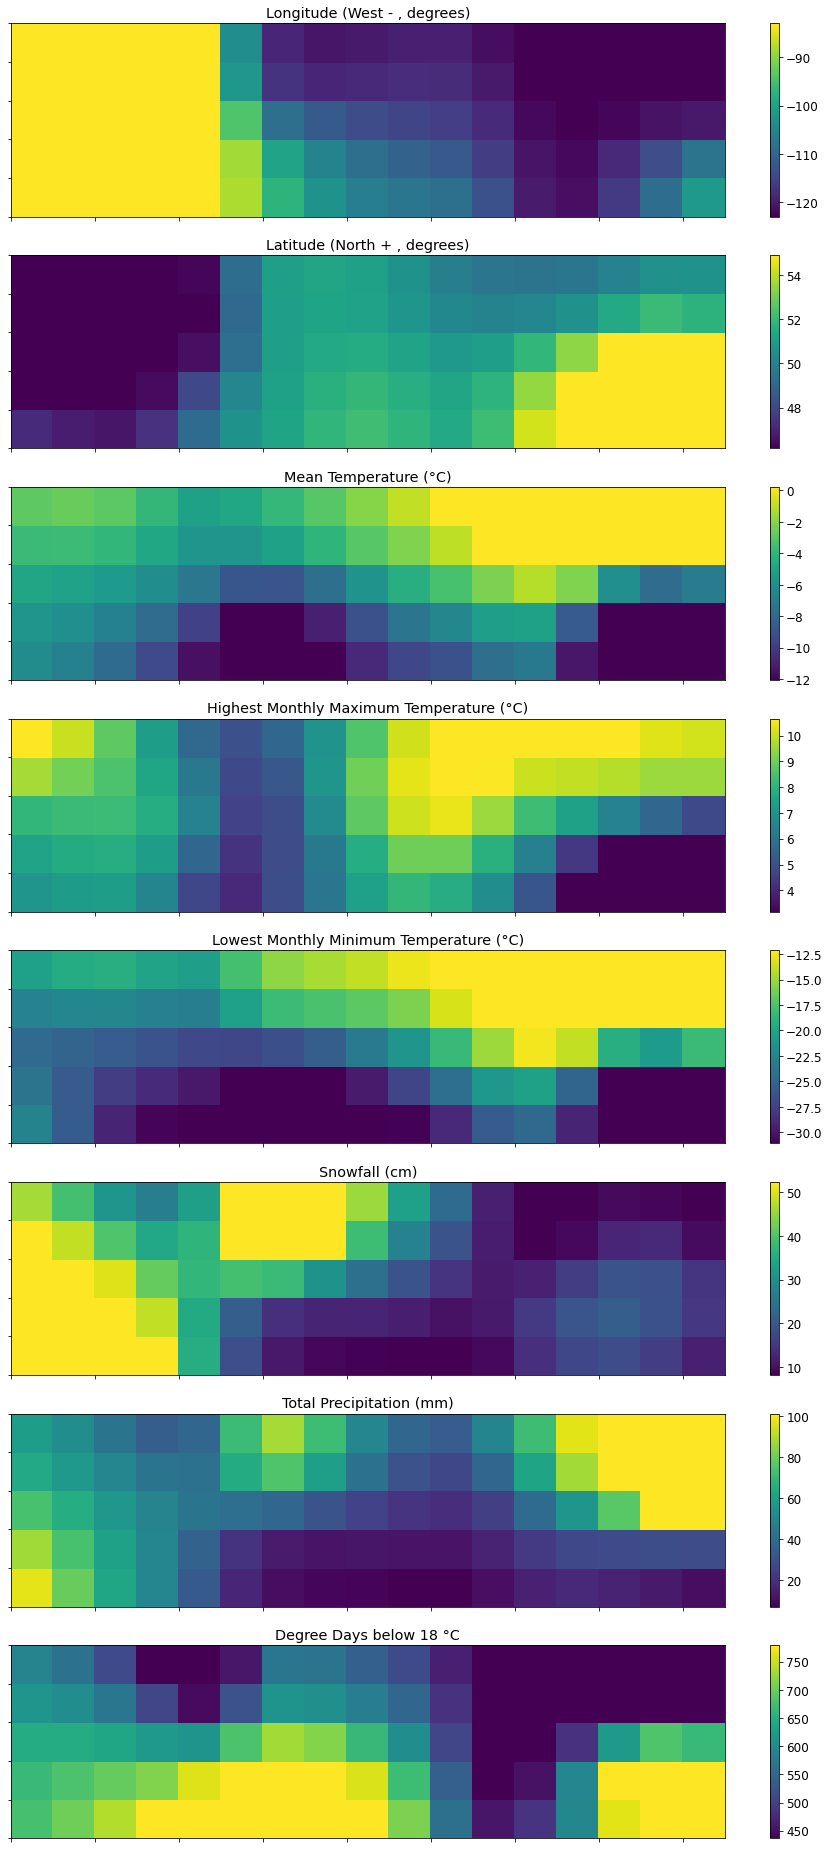

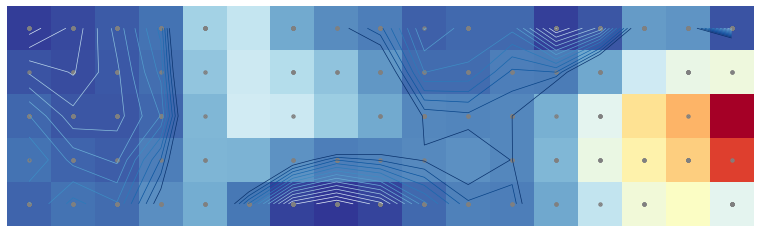

([],
 array([[0.29799226, 0.32409521, 0.37012484, 0.42803548, 0.70942808,
         0.80742371, 0.5720113 , 0.49227882, 0.45742037, 0.37800969,
         0.40134663, 0.40408974, 0.30435087, 0.35482237, 0.53441851,
         0.51840115, 0.34738261],
        [0.34748568, 0.33308089, 0.36121387, 0.41294424, 0.66155813,
         0.83156103, 0.75755808, 0.65654578, 0.52280312, 0.40853644,
         0.41078105, 0.4564453 , 0.4529683 , 0.56875414, 0.83684802,
         0.92825905, 0.9522796 ],
        [0.3944356 , 0.35438043, 0.35811084, 0.39448407, 0.61864096,
         0.84280681, 0.82223163, 0.69370922, 0.5718049 , 0.47853003,
         0.47240212, 0.48259278, 0.5948582 , 0.90874275, 1.17267346,
         1.31485604, 1.7925502 ],
        [0.42418706, 0.38858241, 0.37612315, 0.454323  , 0.6099197 ,
         0.60693807, 0.50675919, 0.45328847, 0.46991839, 0.48467549,
         0.50555079, 0.48155354, 0.61626294, 0.93554625, 1.0947372 ,
         1.23888123, 1.59858599],
        [0.39243015, 0.42899765

In [12]:

# create the SOM network and train it. You can experiment with different normalizations and initializations
sm = SOMFactory().build(
    data.values,
    normalization="var",
    initialization="pca",
    component_names=list(names.values()),
)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

# The quantization error: average distance between each data vector and its BMU.
# The topographic error: the proportion of all data vectors for which first and second BMUs are not adjacent units.
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print(
    "Topographic error = %s; Quantization error = %s"
    % (topographic_error, quantization_error)
)

# component planes view
from sompy.visualization.mapview import View2D

view2D = View2D(30, 30, "rand data", text_size=12)
view2D.show(sm, col_sz=1, which_dim="all", denormalize=True)

# U-matrix plot
from sompy.visualization.umatrix import UMatrixView

umat = UMatrixView(width=10, height=10, title="U-matrix")
umat.show(sm)
